In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tqdm
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image
from collections import defaultdict
from pathlib import Path

In [2]:
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2

from nba_api.stats.endpoints.playbyplay import PlayByPlay
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name
from nba_api.stats.endpoints.playergamelogs import PlayerGameLogs
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

from nba_api.stats.endpoints.leaguedashteamshotlocations import LeagueDashTeamShotLocations
from nba_api.stats.endpoints.leaguedashplayerptshot import LeagueDashPlayerPtShot

from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

from nba_api.stats.endpoints.leaguehustlestatsplayer import LeagueHustleStatsPlayer

In [3]:
from nba_api.stats.endpoints.leaguedashplayerclutch import LeagueDashPlayerClutch

In [4]:
plt.style.use('fivethirtyeight')

### Current season clutch

In [5]:
clutch_data = LeagueDashPlayerClutch(season='2020-21')

In [6]:
clutch_df = clutch_data.get_data_frames()[0]

In [7]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle
zoom = 0.25
team_root_dir = '../../team_logos_id/'
player_root_dir = 'player_imgs/'

def get_player_img(player_id, zoom=1.0):
    #print(path)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)

def get_team_img(team_id, zoom=0.1):
    #print(path)
    return OffsetImage(plt.imread(f'{team_root_dir}{team_id}.png'), zoom=zoom)

In [8]:
clutch_df.loc[:, 'TSA'] = (clutch_df.FGA + 0.44 * clutch_df.FTA)

clutch_df.loc[:, 'TS_PCT'] = clutch_df.PTS / (2 * clutch_df.TSA) * 100 

top_40 = clutch_df.sort_values(by='TSA', ascending=False).iloc[:40]

Text(45, 41.0, "Note: the x-y value is in CENTER of player's image")

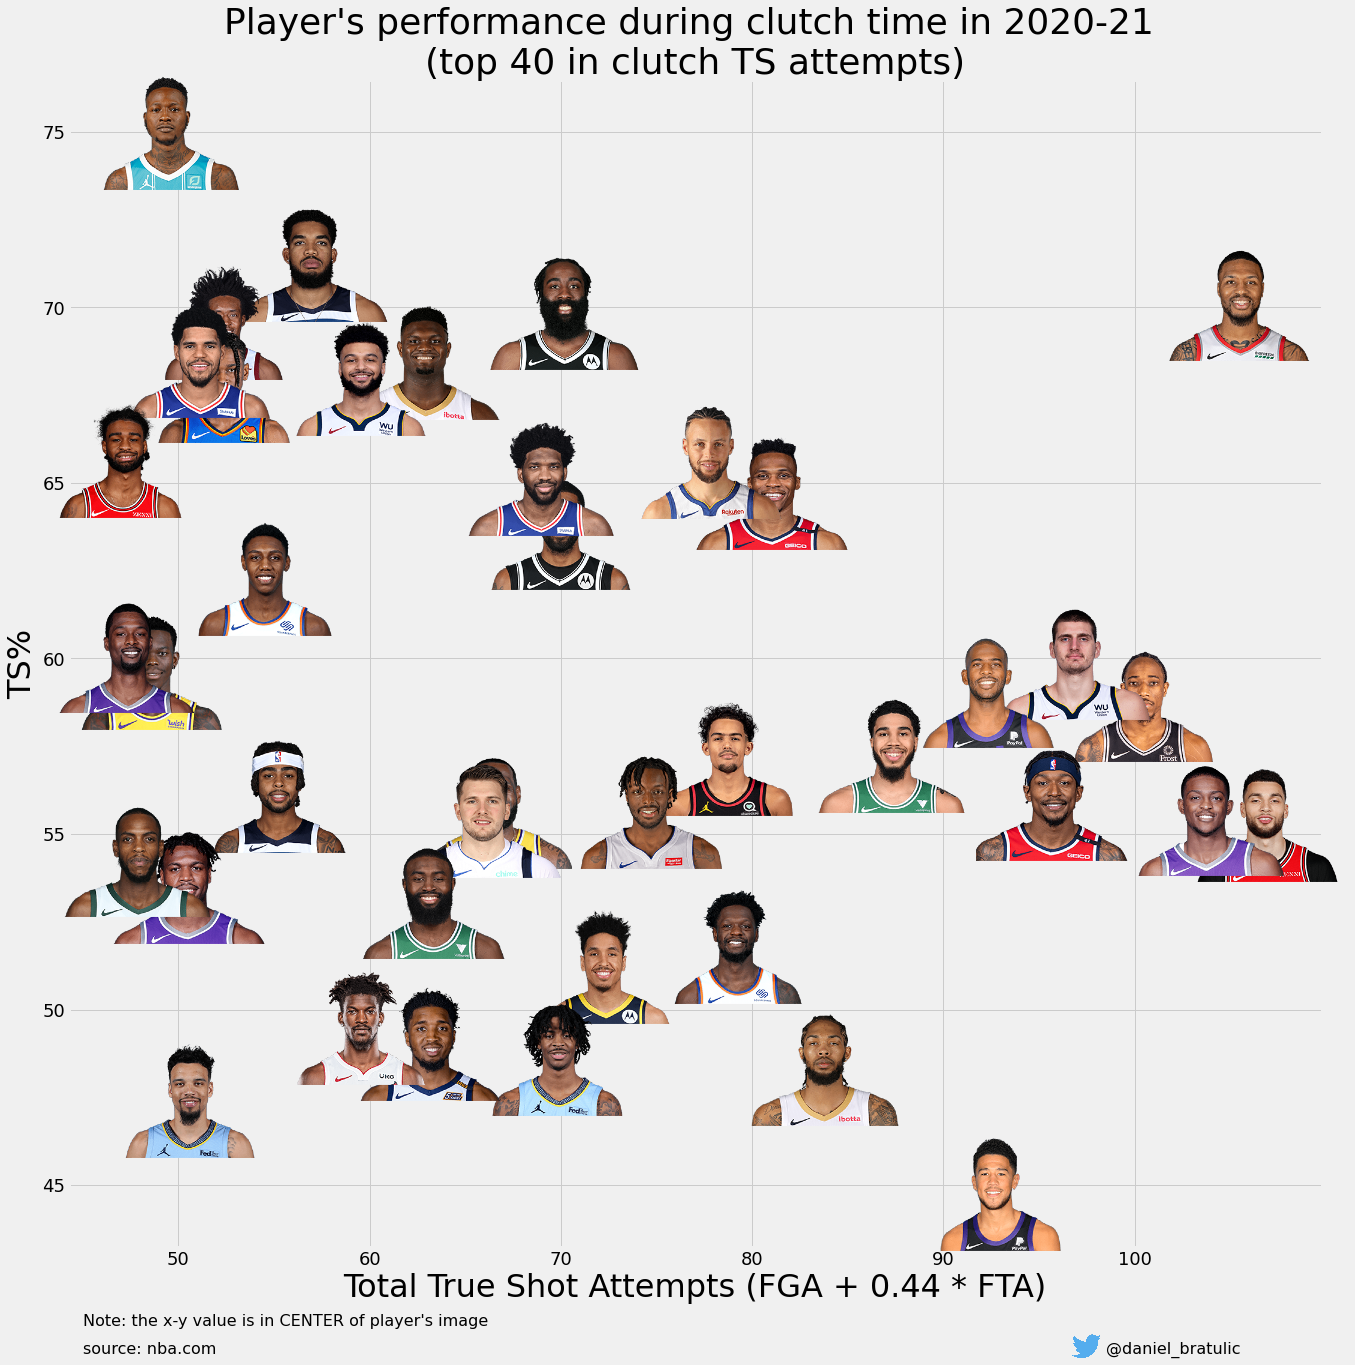

In [139]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=top_40.TSA, y=top_40.TS_PCT, s=10, alpha=0.5, edgecolors='black')
for index in range(len(top_40)):
    item = top_40.iloc[index]
    ab = AnnotationBbox(get_player_img(item.PLAYER_ID, zoom=0.6), (item.TSA, item.TS_PCT), frameon=False)
    ax.add_artist(ab)

data = np.arange(34, 44)
#ax.plot(data, reg.predict(data.reshape(-1, 1)), color='black', ls='--', lw=2)
ax.tick_params(labelsize=18)
ax.set_xlabel("Total True Shot Attempts (FGA + 0.44 * FTA)", size=32)
ax.set_ylabel("TS%", size=32)
ax.set_title("Player's performance during clutch time in 2020-21 \n(top 40 in clutch TS attempts)", size=36)
#ax.text(x=35, y=108.75, rotation=23, s=f"R^2 = {r_value:.2f}", size=18)

y_coord = 40.2
offset_image = OffsetImage(plt.imread(f'../../twitter_logo.png'), zoom=0.025, )
offset_image.set_offset((1065, -3))
ax.add_artist(offset_image)
ax.text(x=98.5, y=y_coord, ha='left', s='@daniel_bratulic', size=16)
ax.text(x=45, y=y_coord, ha='left', s='source: nba.com', size=16)
ax.text(x=45, y=y_coord+0.8, ha='left', s="Note: the x-y value is in CENTER of player's image", size=16)

## TODO DIFF in TS% CLUTCH/NON-CLUTCH

In [9]:
player_stats = LeagueDashPlayerStats(season='2020-21', per_mode_detailed='PerGame').get_data_frames()[0]

In [10]:
top40_scoring = player_stats.sort_values(by='PTS', ascending=False).iloc[:40]

In [11]:
top40_scoring.loc[:, 'TSA'] = (top40_scoring.FGA + 0.44 * top40_scoring.FTA)

top40_scoring.loc[:, 'TS_PCT'] = top40_scoring.PTS / (2 * top40_scoring.TSA) * 100 

In [12]:
merged_df = pd.merge(left=top40_scoring, right=clutch_df, on=('PLAYER_ID', 'PLAYER_NAME'), suffixes=('_REGULAR', '_CLUTCH'))

In [13]:
merged_df.loc[:, ['PLAYER_NAME', 'TS_PCT_REGULAR', 'TS_PCT_CLUTCH']]

PLAYER_NAME  TS_PCT_REGULAR  TS_PCT_CLUTCH
0             Stephen Curry       66.078365      65.586420
1              Bradley Beal       59.351145      55.845511
2               Joel Embiid       63.401077      65.104167
3               Luka Doncic       59.306569      55.370146
4            Damian Lillard       60.552893      70.102311
5     Giannis Antetokounmpo       63.440276      63.626723
6              Kevin Durant       68.384539      70.993915
7               Zach LaVine       63.399115      55.243446
8              Kyrie Irving       60.727831      63.571429
9           Zion Williamson       64.922481      67.355890
10             Jayson Tatum       57.311567      59.644157
11         Donovan Mitchell       56.798623      49.019608
12             Nikola Jokic       64.851485      59.867878
13            Kawhi Leonard       62.053313      47.278598
14             Devin Booker       58.582981      44.758412
15               Trae Young       58.600960      57.135602
16             LeBron James       60.425858      56.012479
17             De'Aaron Fox       56.583438      55.437717
18             James Harden       61.463415      69.840365
19             Jaylen Brown       59.070122      52.145411
20       Karl-Anthony Towns       61.264822      72.563925
21            Collin Sexton       57.710501      69.550305
22           Brandon Ingram       59.058961      48.928239
23            Julius Randle       57.545368      51.767677
24           Nikola Vucevic       56.785646      50.442913
25  Shai Gilgeous-Alexander       62.500000      67.748092
26              Paul George       60.620012      48.899756
27              CJ McCollum       56.999204      60.084826
28             Jerami Grant       55.648991      55.630027
29             Jimmy Butler       59.878587      51.302932
30            DeMar DeRozan       58.788470      57.774991
31            Anthony Davis       56.913997      51.282051
32        Russell Westbrook       50.167224      64.718935
33           Christian Wood       59.939217      53.157216
34             Jamal Murray       59.191423      67.953020
35          Malcolm Brogdon       56.060927      51.218162
36            Pascal Siakam       54.831532      40.322581
37                John Wall       50.165595      46.439628
38          Khris Middleton       58.535179      58.070866
39             Terry Rozier       58.562197      74.959481

Text(50, 36.0, "Note: the x-y value is in CENTER of player's image")

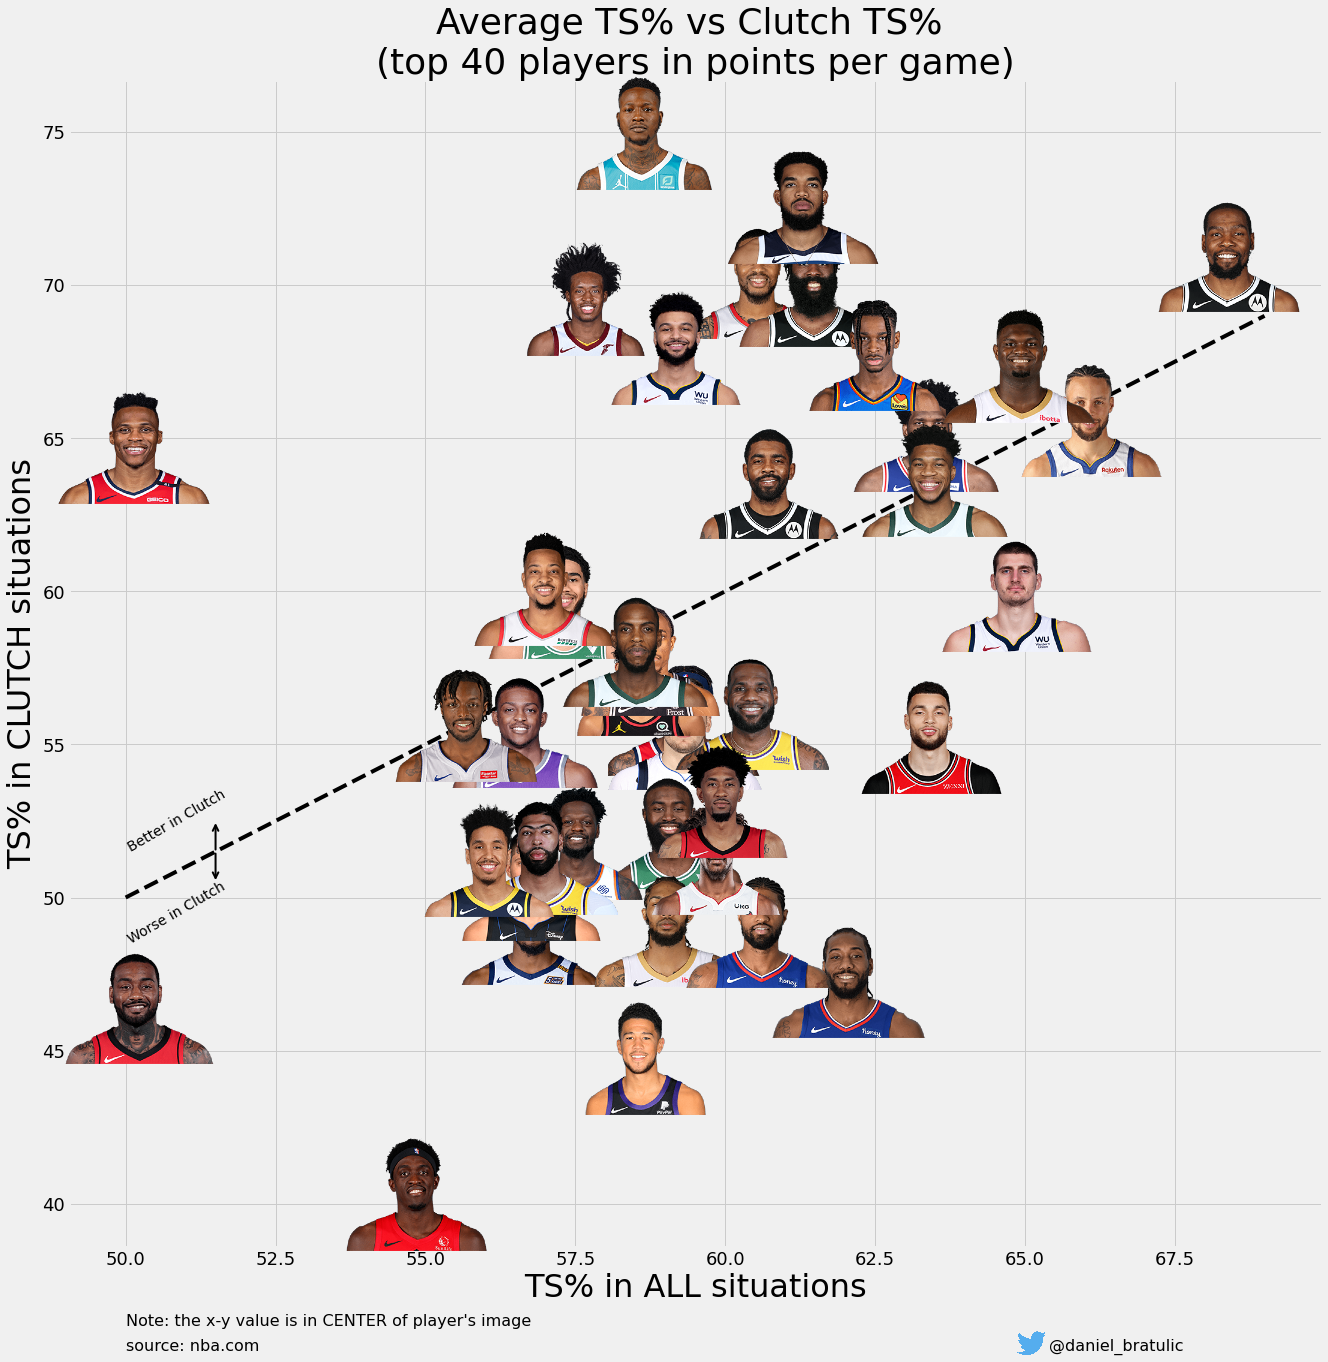

In [14]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=merged_df.TS_PCT_REGULAR, y=merged_df.TS_PCT_CLUTCH, s=10, alpha=0.5, edgecolors='black')
for index in range(len(merged_df)):
    item = merged_df.iloc[index]
    ab = AnnotationBbox(get_player_img(item.PLAYER_ID, zoom=0.6), (item.TS_PCT_REGULAR, item.TS_PCT_CLUTCH), frameon=False)
    ax.add_artist(ab)

data = np.arange(34, 44)
#ax.plot(data, reg.predict(data.reshape(-1, 1)), color='black', ls='--', lw=2)
ax.tick_params(labelsize=18)
ax.set_xlabel("TS% in ALL situations", size=32)
ax.set_ylabel("TS% in CLUTCH situations", size=32)
ax.set_title("Average TS% vs Clutch TS% \n(top 40 players in points per game)", size=36)
#ax.text(x=35, y=108.75, rotation=23, s=f"R^2 = {r_value:.2f}", size=18)

ax.plot(np.arange(50, 70, 1), np.arange(50, 70, 1), color='black', ls='--')
rotation=30
ax.annotate("", xy=(51.5, 52.5), xytext=(51.5, 51.5), arrowprops=dict(arrowstyle="->", color='black', lw=2))
ax.annotate("", xy=(51.5, 50.5), xytext=(51.5, 51.5), arrowprops=dict(arrowstyle="->", color='black', lw=2))
ax.text(x=50, y=51.5, s='Better in Clutch', rotation=rotation)
ax.text(x=50, y=48.5, s='Worse in Clutch', rotation=rotation)

y_coord = 35.2
offset_image = OffsetImage(plt.imread(f'../../twitter_logo.png'), zoom=0.025, )
offset_image.set_offset((1010, -3))
ax.add_artist(offset_image)
ax.text(x=65.4, y=y_coord, ha='left', s='@daniel_bratulic', size=16)
ax.text(x=50, y=y_coord, ha='left', s='source: nba.com', size=16)
ax.text(x=50, y=y_coord+0.8, ha='left', s="Note: the x-y value is in CENTER of player's image", size=16)


## Last 5 seasons

In [35]:
seasons = [f"{item}-{str(item+1)[-2:]}" for item in range(2015, 2021)]

In [36]:
clutch_dfs = []
for season in seasons:
    clutch_dfs.append(LeagueDashPlayerClutch(season=season, per_mode_detailed='Totals').get_data_frames()[0])
    time.sleep(0.5)


In [37]:
full_df = pd.concat(clutch_dfs)

In [38]:
full_df = full_df.groupby(('PLAYER_ID', 'PLAYER_NAME')).sum().reset_index()

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [39]:
full_df.loc[:, 'TSA'] = (full_df.FGA + 0.44 * full_df.FTA)

full_df.loc[:, 'TS_PCT'] = full_df.PTS / (2 * full_df.TSA) * 100 

top_40 = full_df.sort_values(by='TSA', ascending=False).iloc[:41]

In [43]:
full_df.loc[full_df.PLAYER_NAME == 'Terry Rozier']

PLAYER_ID   PLAYER_NAME     TEAM_ID    AGE   GP   W   L  W_PCT     MIN  \
471    1626179  Terry Rozier  9663676484  147.0  131  78  53  3.541  366.47   

     FGM  ...  PF_RANK  PFD_RANK  PTS_RANK  PLUS_MINUS_RANK  \
471   74  ...     1424      1218      1033              928   

     NBA_FANTASY_PTS_RANK  DD2_RANK  TD3_RANK  CFID     TSA     TS_PCT  
471                  1089       938       112     6  171.52  69.088153  

[1 rows x 65 columns]

In [42]:
full_df.loc[full_df.TSA > 200].sort_values(by='TS_PCT', ascending=False)

PLAYER_ID      PLAYER_NAME     TEAM_ID    AGE   GP    W    L  W_PCT  \
165     201939    Stephen Curry  9663676464  183.0  122   81   41  3.277   
89      200755        JJ Redick  9663676484  206.0  178  105   73  3.337   
413     203954      Joel Embiid  8053063775  125.0  133   85   48  3.173   
265     202738    Isaiah Thomas  8053063730  145.0  116   65   51  1.899   
588    1628369     Jayson Tatum  6442450952   86.0  155   85   70  2.180   
..         ...              ...         ...    ...  ...  ...  ...    ...   
411     203952   Andrew Wiggins  9663676488  141.0  223   88  135  2.351   
380     203901    Elfrid Payton  9663676506  147.0  141   57   84  2.479   
30        2546  Carmelo Anthony  9663676523  206.0  165   87   78  3.462   
244     202696   Nikola Vucevic  9663676506  165.0  191   83  108  2.563   
129     201565     Derrick Rose  9663676510  177.0  133   56   77  2.413   

            MIN  FGM  ...  PF_RANK  PFD_RANK  PTS_RANK  PLUS_MINUS_RANK  \
165  456.685000  141  ...     1459       440       433              572   
89   574.578333   77  ...     1506       529       467              554   
413  454.533333  113  ...     1922        62       119              453   
265  369.750000  108  ...     1352       647       832              996   
588  526.038333  115  ...     1546       157        96              549   
..          ...  ...  ...      ...       ...       ...              ...   
411  865.791667  149  ...     2175       409       311             2296   
380  518.950000   83  ...     1855       765       645             1642   
30   590.885000  103  ...     1769       755       656              846   
244  672.308333  123  ...     2377       433       392             1519   
129  486.126667  111  ...     1198       947       649             2109   

     NBA_FANTASY_PTS_RANK  DD2_RANK  TD3_RANK  CFID     TSA     TS_PCT  
165                   570       688       112     6  380.96  65.492440  
89                    735      1072       112     6  238.16  64.032583  
413                   120        98        81     5  346.32  62.803188  
265                   915       694        93     5  319.24  62.022303  
588                   100       215        76     4  284.04  61.963104  
..                    ...       ...       ...   ...     ...        ...  
411                   332       759       112     6  473.88  47.902423  
380                   603       437        59     6  228.40  47.504378  
30                    669       628       112     6  327.72  46.533626  
244                   323        58        86     6  355.80  45.531197  
129                   809       953       112     6  305.88  45.115732  

[77 rows x 65 columns]

In [40]:
top_40 = top_40.loc[top_40.PLAYER_ID != 2548]

In [41]:
top_40

PLAYER_ID            PLAYER_NAME     TEAM_ID    AGE   GP    W    L  \
130     201566      Russell Westbrook  9663676549  177.0  227  123  104   
167     201942          DeMar DeRozan  9663676560  171.0  239  128  111   
275     203081         Damian Lillard  9663676542  165.0  224  123  101   
162     201935           James Harden  9663676476  171.0  212  132   80   
237     202689           Kemba Walker  9663676540  170.0  218  102  116   
272     203078           Bradley Beal  9663676584  152.0  214  105  109   
29        2544           LeBron James  9663676458  201.0  189  119   70   
255     202710           Jimmy Butler  9663676483  171.0  193  109   84   
204     202331            Paul George  9663676520  170.0  209  111   98   
230     202681           Kyrie Irving  9663676456  159.0  154   92   62   
327     203468            CJ McCollum  9663676542  159.0  215  117   98   
457    1626164           Devin Booker  9663676536  129.0  188   82  106   
411     203952         Andrew Wiggins  9663676488  141.0  223   88  135   
270     203076          Anthony Davis  9663676454  153.0  174   93   81   
377     203897            Zach LaVine  9663676464  141.0  165   61  104   
92      200768             Kyle Lowry  9663676566  195.0  206  114   92   
426     203999           Nikola Jokic  9663676458  141.0  211  121   90   
172     201950           Jrue Holiday  9663676449  170.0  206   93  113   
243     202695          Kawhi Leonard  8053063771  137.0  134   83   51   
66      101108             Chris Paul  9663676498  200.0  179  117   62   
451    1626157     Karl-Anthony Towns  9663676500  135.0  220   93  127   
195     202322              John Wall  8053063801  136.0  131   67   64   
594    1628378       Donovan Mitchell  6442451048   90.0  118   69   49   
165     201939          Stephen Curry  9663676464  183.0  122   81   41   
352     203507  Giannis Antetokounmpo  9663676494  141.0  189  109   80   
250     202704         Reggie Jackson  9663676552  171.0  133   70   63   
101     201142           Kevin Durant  8053063743  146.0  124   77   47   
103     201144            Mike Conley  9663676576  183.0  161   88   73   
288     203095          Evan Fournier  9663676503  153.0  199   86  113   
210     202339           Eric Bledsoe  9663676499  171.0  170   85   85   
278     203084        Harrison Barnes  9663676502  158.0  221  100  121   
244     202696         Nikola Vucevic  9663676506  165.0  191   83  108   
329     203471        Dennis Schroder  9663676478  147.0  187  100   87   
407     203944          Julius Randle  9663676485  141.0  195   78  117   
413     203954            Joel Embiid  8053063775  125.0  133   85   48   
199     202326       DeMarcus Cousins  8053063728  136.0  124   59   65   
299     203114        Khris Middleton  9663676494  159.0  165   98   67   
351     203506         Victor Oladipo  9663676523  158.0  151   84   67   
79      101150           Lou Williams  9663676467  189.0  182   88   94   
450    1626156       D'Angelo Russell  9663676496  135.0  142   61   81   

     W_PCT         MIN  FGM  ...  PF_RANK  PFD_RANK  PTS_RANK  \
130  3.268  872.750000  291  ...     2427       120        62   
167  3.182  902.573333  275  ...     2059        91        48   
275  3.321  877.881667  237  ...     2231        60        42   
162  3.851  765.751667  203  ...     2342        28        51   
237  2.807  791.191667  214  ...     1980       146       176   
272  2.894  838.210000  204  ...     2268       163       114   
29   3.797  696.131667  231  ...     2150       148       111   
255  3.391  793.616667  185  ...     2222        56       107   
204  3.183  796.675000  171  ...     2262       203       191   
230  3.510  584.450000  197  ...     1701       192       158   
327  3.305  826.468333  195  ...     2079       474       178   
457  2.665  644.633333  154  ...     2449       299       271   
411  2.351  865.791667  149  ...     2175       409       311   
270  3.277  678.635

Text(330, 43.0, "Note: the x-y value is in CENTER of player's image")

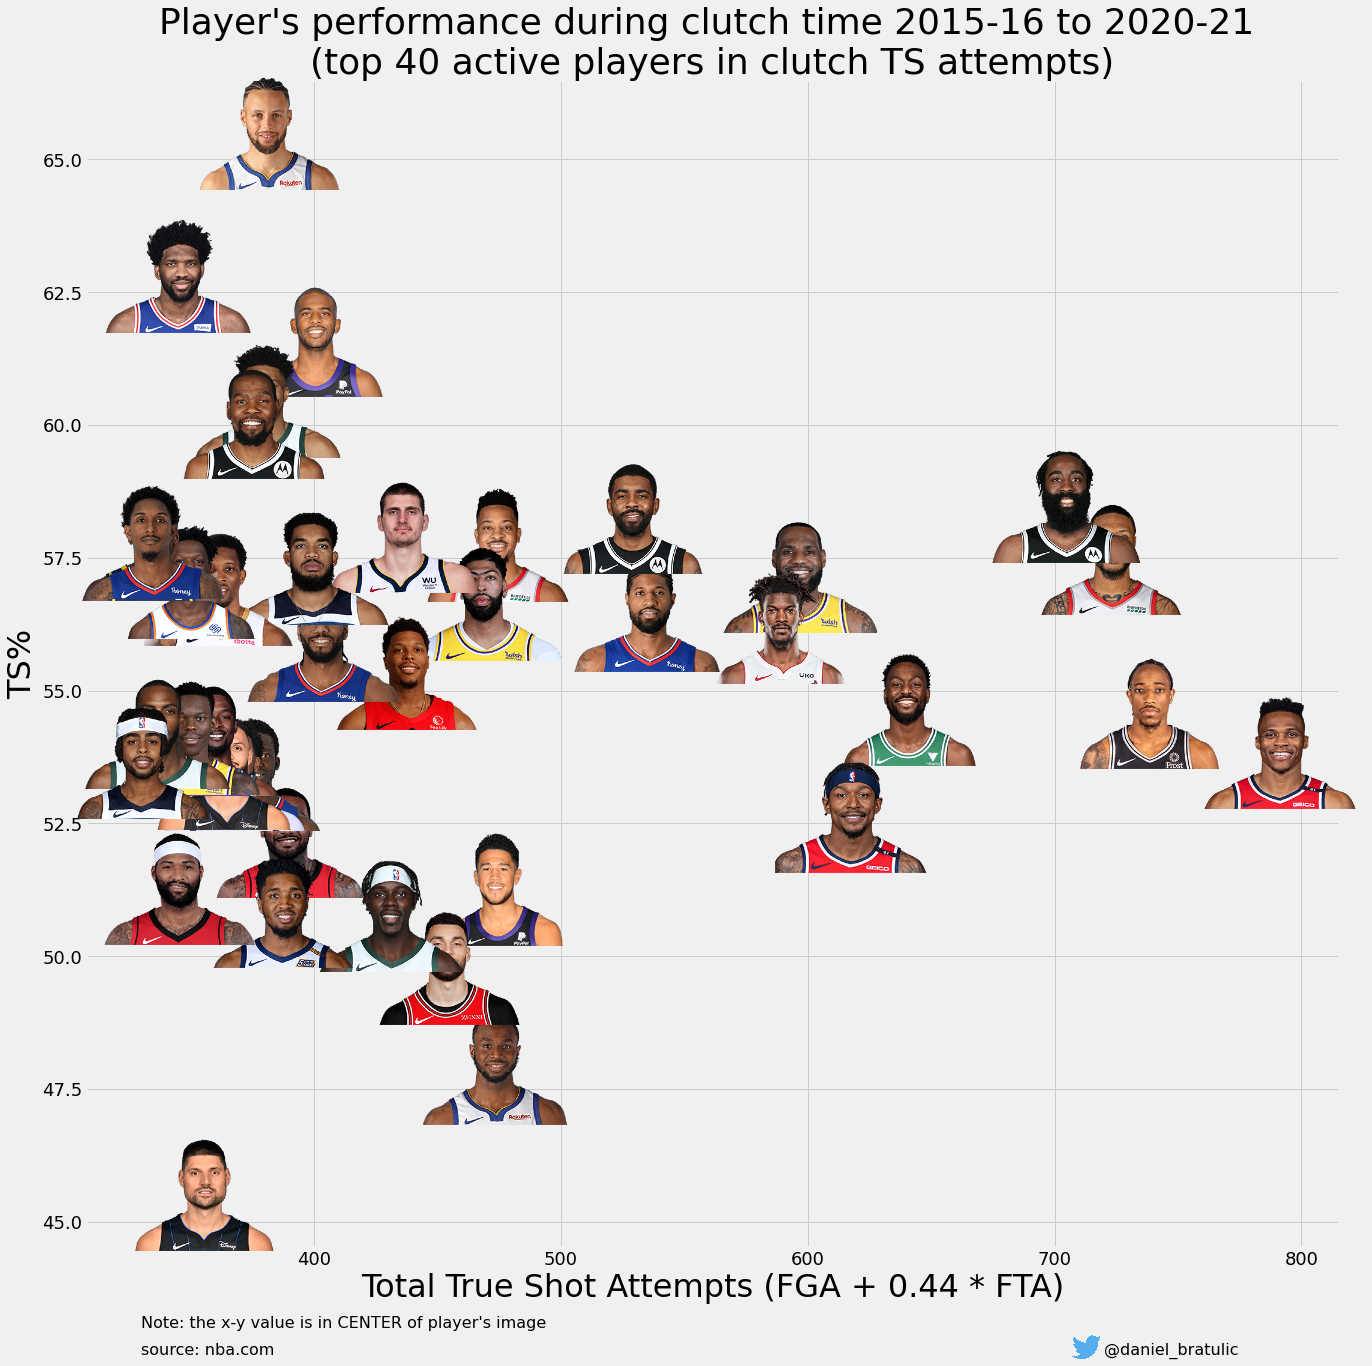

In [152]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=top_40.TSA, y=top_40.TS_PCT, s=10, alpha=0.5, edgecolors='black')
for index in range(len(top_40)):
    item = top_40.iloc[index]
    ab = AnnotationBbox(get_player_img(item.PLAYER_ID, zoom=0.6), (item.TSA, item.TS_PCT), frameon=False)
    ax.add_artist(ab)

data = np.arange(34, 44)
#ax.plot(data, reg.predict(data.reshape(-1, 1)), color='black', ls='--', lw=2)
ax.tick_params(labelsize=18)
ax.set_xlabel("Total True Shot Attempts (FGA + 0.44 * FTA)", size=32)
ax.set_ylabel("TS%", size=32)
ax.set_title("Player's performance during clutch time 2015-16 to 2020-21 \n(top 40 active players in clutch TS attempts)", size=36)

y_coord = 42.5
offset_image = OffsetImage(plt.imread(f'../../twitter_logo.png'), zoom=0.025, )
offset_image.set_offset((1065, -3))
ax.add_artist(offset_image)
ax.text(x=720, y=y_coord, ha='left', s='@daniel_bratulic', size=16)
ax.text(x=330, y=y_coord, ha='left', s='source: nba.com', size=16)
ax.text(x=330, y=y_coord+0.5, ha='left', s="Note: the x-y value is in CENTER of player's image", size=16)
#ax.text(x=35, y=108.75, rotation=23, s=f"R^2 = {r_value:.2f}", size=18)

## Critical situations

In [5]:
seasons = [f"{item}-{str(item+1)[-2:]}" for item in range(1996, 2021)]

In [6]:
clutch_dfs = []
for season in seasons:
    clutch_dfs.append(LeagueDashPlayerClutch(season=season, per_mode_detailed='Totals', ahead_behind='Behind or Tied', point_diff='3', clutch_time='Last 10 Seconds').get_data_frames()[0])
    time.sleep(0.5)


In [7]:
full_df = pd.concat(clutch_dfs)

In [8]:
full_df = full_df.groupby(('PLAYER_ID', 'PLAYER_NAME')).sum().reset_index()

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [9]:
full_df.loc[:, 'TSA'] = (full_df.FGA + 0.44 * full_df.FTA)

full_df.loc[:, 'TS_PCT'] = full_df.PTS / (2 * full_df.TSA) * 100 

top_40 = full_df.sort_values(by='TSA', ascending=False).iloc[:41]

In [10]:
full_df.loc[:, 'FG_PCT'] = full_df.FGM / full_df.FGA
full_df.loc[:, 'FG3_PCT'] = full_df.FG3M / full_df.FG3A
full_df.loc[:, 'FT_PCT'] = full_df.FTM / full_df.FTA

In [11]:
full_df.loc[full_df.FGA > 30].sort_values(by='FG_PCT', ascending=False)

PLAYER_ID          PLAYER_NAME       TEAM_ID    AGE   GP   W    L  \
883      200752             Rudy Gay  2.415919e+10  405.0  162  42  120   
519        1890         Shawn Marion  2.576980e+10  472.0  178  53  125   
712        2546      Carmelo Anthony  2.899103e+10  512.0  192  52  140   
465        1717        Dirk Nowitzki  3.221225e+10  610.0  234  79  155   
633        2225          Tony Parker  2.899103e+10  513.0  155  63   92   
...         ...                  ...           ...    ...  ...  ..  ...   
518        1889         Andre Miller  2.738042e+10  544.0  193  60  133   
1101     202331          Paul George  1.771674e+10  285.0  115  36   79   
1092     202322            John Wall  1.610613e+10  246.0  101  29   72   
212         467           Jason Kidd  2.738042e+10  544.0  197  62  135   
314         949  Shareef Abdur-Rahim  1.771674e+10  275.0  140  31  109   

      W_PCT        MIN  FGM  ...  PF_RANK  PFD_RANK  PTS_RANK  \
883   3.797  44.155000   23  ...     2596       702       672   
519   4.784  47.916667   12  ...     2166       557      1049   
712   4.718  50.486667   33  ...     2237       610       692   
465   6.990  57.146667   26  ...     2702       571       934   
633   6.797  40.585000   14  ...     2641       739      1245   
...     ...        ...  ...  ...      ...       ...       ...   
518   5.103  47.311667    5  ...     4035       485      1435   
1101  4.204  32.461667    6  ...     2026       305       617   
1092  2.661  23.785000    6  ...     1976       313       591   
212   5.162  48.938333    7  ...     4006       288      1158   
314   2.315  34.231667    4  ...     1632       135       869   

      PLUS_MINUS_RANK  NBA_FANTASY_PTS_RANK  DD2_RANK  TD3_RANK  CFID    TSA  \
883              2526                  1091      1129       140    15  63.20   
519              2349                  1407       693       107    16  33.32   
712              3337                   926      1208       154    18  98.80   
465              2038                  1541       684       139    20  81.04   
633              2462                  2083      1740       131    18  40.00   
...               ...                   ...       ...       ...   ...    ...   
518              3269                  2097      1046       109    17  37.08   
1101             2439                  1058       938       117    11  50.48   
1092             2125                  1032       289        93    10  50.28   
212              2509                  1220       714        67    17  57.40   
314              2060                  1388       521        66    11  33.76   

         TS_PCT  
883   44.303797  
519   43.517407  
712   43.522267  
465   43.805528  
633   38.750000  
...         ...  
518   21.574973  
1101  29.714739  
1092  21.877486  
212   21.777003  
314   16.291469  

[87 rows x 65 columns]

In [12]:
top_20_fga = full_df.sort_values(by='FGA', ascending=False).iloc[:20]

#### Ubacit tablicu

In [52]:
top_20_fga = top_20_fga.loc[:, ['PLAYER_ID', 'PLAYER_NAME', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT']]

In [33]:
for index in tqdm.tqdm(range(len(top_20_fga))):
    item = top_20_fga.iloc[index]
    #team_id = item.TEAM_ID
    player_id = item.PLAYER_ID
    if Path(f'player_imgs/{player_id}.png').exists():
        continue
    #url = f"https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/{team_id}/2020/260x190/{player_id}.png"
    #response = requests.get(url)
    #if response.status_code != 200:
    url = f"https://cdn.nba.com/headshots/nba/latest/260x190/{player_id}.png"
    response = requests.get(url)
    if response.status_code != 200:
        print(f"ERROR: {player_id} can't be downloaded")
        continue
    #img = Image.open(BytesIO(response.content))
    with open(f'player_imgs/{player_id}.png', 'wb') as f:
        f.write(response.content)
    time.sleep(0.05)

 50%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                       | 10/20 [00:01<00:02,  3.58it/s]

ERROR: 951 can't be downloaded


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.85it/s]


In [53]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle
zoom = 0.5

player_root_dir = f'player_imgs/'

def get_player_img(player_id, zoom=0.5):
    #print(path)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)


In [30]:
top_20_fga.head()

PLAYER_ID   PLAYER_NAME  PTS  FGM  FGA    FG_PCT  FG3M  FG3A   FG3_PCT  \
338        977   Kobe Bryant  104   36  131  0.274809    10    58  0.172414   
461       1713  Vince Carter  103   32  112  0.285714    19    54  0.351852   
710       2544  LeBron James   81   24  108  0.222222     8    51  0.156863   
714       2548   Dwyane Wade   60   19   99  0.191919     3    35  0.085714   
466       1718   Paul Pierce   61   20   92  0.217391     7    39  0.179487   

     FTM  FTA    FT_PCT  
338   22   31  0.709677  
461   20   22  0.909091  
710   25   41  0.609756  
714   19   26  0.730769  
466   14   19  0.736842

In [54]:
top_20_fga.loc[:, 'TS_PCT'] = top_20_fga.PTS / (2 * (top_20_fga.FGA + 0.44 * top_20_fga.FTA))

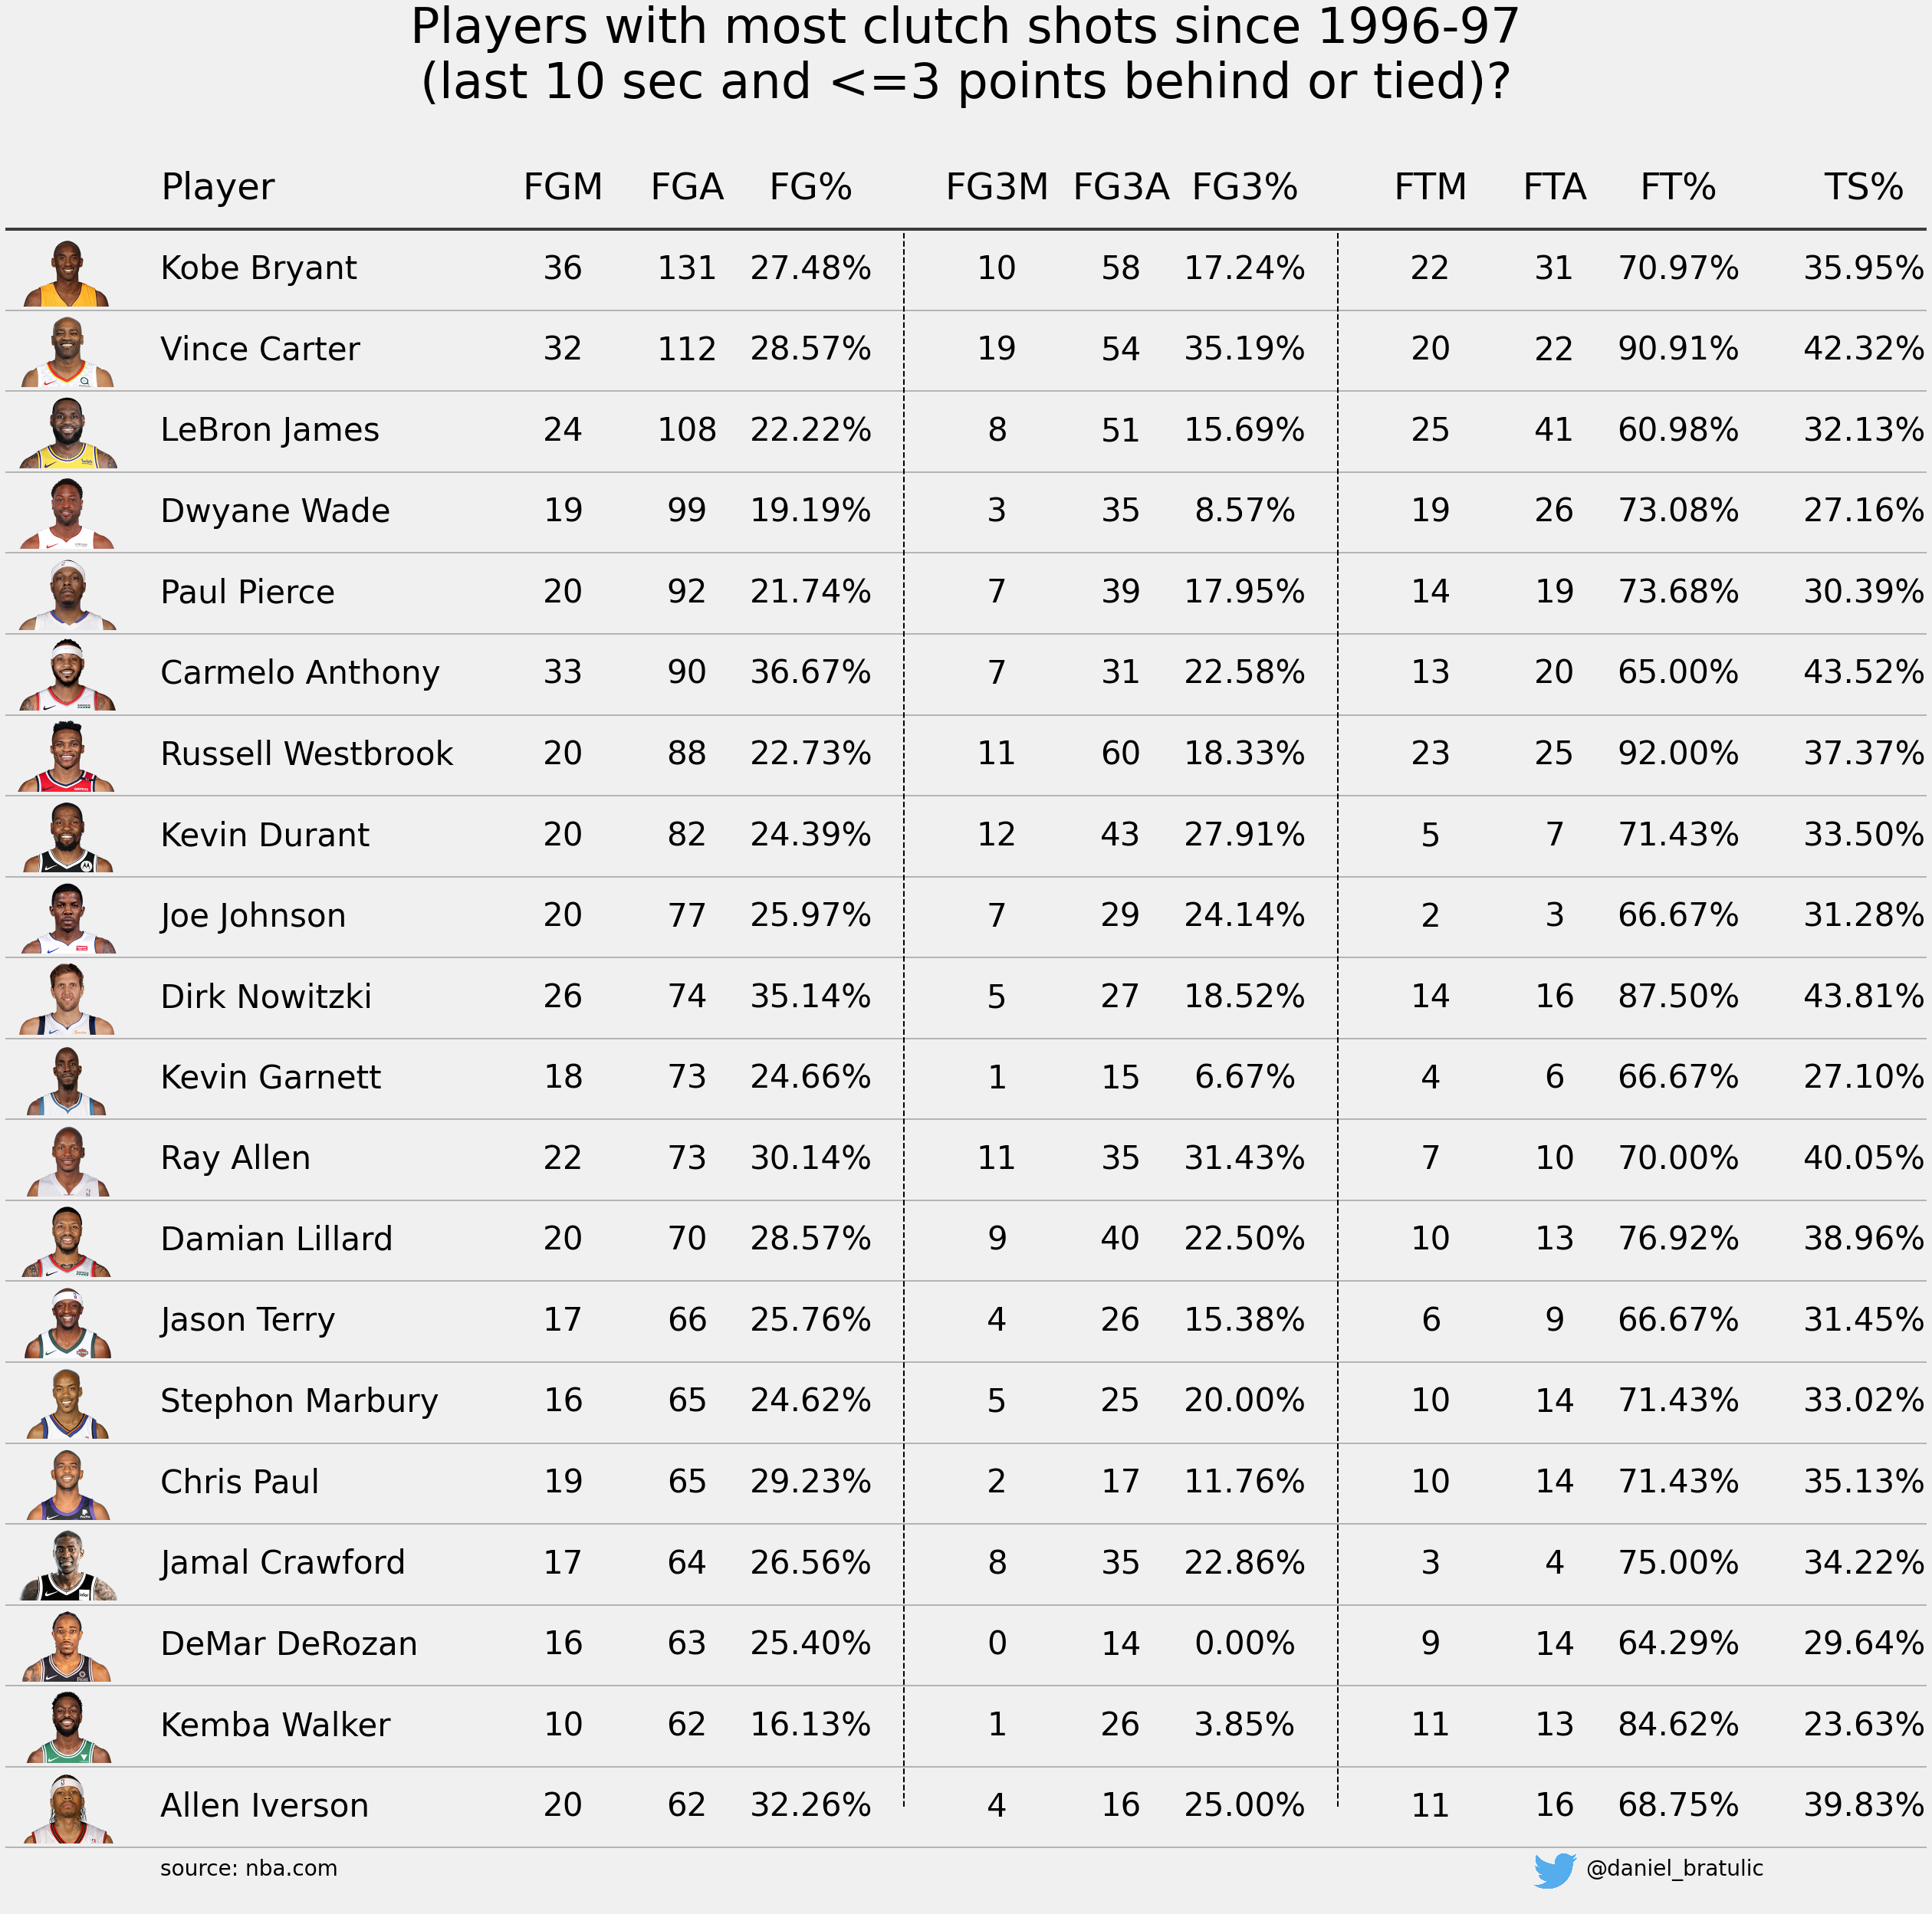

In [55]:
fig, ax = plt.subplots(figsize=(40, 40))
number_size = 42
font_size = 36
font_title = 48
title_size = 64
#top = 10

sorted_open_df = top_20_fga
top = len(top_20_fga)
for i in range(top):
    item = top_20_fga.iloc[i]
    player_id = item.PLAYER_ID
    y_coord = top - i - 1
    #if i % 2 == 1:
    #    color = '#EAE8E8'
    #    rect = Rectangle((-4.5, y_coord + 0.5), width=15, height=1, fill=True, color=color)
    #    ax.add_patch(rect)
    
    ab = AnnotationBbox(get_player_img(player_id), (0.1, y_coord), frameon=False)
    ax.add_artist(ab)
    #ax.text(x=0.25, y=y_coord, ha='left', va='center', s=item.SEASON, size=font_size)
    ax.text(x=0.25, y=y_coord, ha='left', va='center', s=item.PLAYER_NAME, size=number_size)
    ax.axhline(y=y_coord-0.5, xmin=-0.25, xmax=10, color='#A0A0A0', alpha=0.75, lw=2)
    
    ax.text(x=0.9, y=y_coord, ha='center', va='center', s=f"{item.FGM}", size=number_size)
    ax.text(x=1.1, y=y_coord, ha='center', va='center', s=f"{item.FGA}", size=number_size)
    ax.text(x=1.3, y=y_coord, ha='center', va='center', s=f"{item.FG_PCT * 100:.2f}%", size=number_size)
    ax.text(x=1.6, y=y_coord, ha='center', va='center', s=f"{item.FG3M}", size=number_size)
    ax.text(x=1.8, y=y_coord, ha='center', va='center', s=f"{item.FG3A}", size=number_size)
    ax.text(x=2.0, y=y_coord, ha='center', va='center', s=f"{item.FG3_PCT * 100:.2f}%", size=number_size)
    ax.text(x=2.3, y=y_coord, ha='center', va='center', s=f"{item.FTM}", size=number_size)
    ax.text(x=2.5, y=y_coord, ha='center', va='center', s=f"{item.FTA}", size=number_size)
    ax.text(x=2.7, y=y_coord, ha='center', va='center', s=f"{item.FT_PCT * 100:.2f}%", size=number_size)
    ax.text(x=3.0, y=y_coord, ha='center', va='center', s=f"{item.TS_PCT * 100:.2f}%", size=number_size)
    
    #y_img_start = y_coord-0.5 + (1 - 0.730769232) / 2
    #ax.imshow(img, extent=(0, 1.36, y_img_start-0.5, y_img_start + 0.1), aspect='auto')
    #ax.imshow(img, extent=(0, 260, 0, 190), aspect=260/190)
    
#ax.text(x=0.25, y=top, s='Season', ha='left', va='center', size=font_title)
ax.text(x=0.25, y=top, s='Player', ha='left', va='center', size=font_title)
ax.text(x=0.9, y=top, ha='center', va='center', s="FGM", size=font_title)
ax.text(x=1.1, y=top, ha='center', va='center', s="FGA", size=font_title)
ax.text(x=1.3, y=top, ha='center', va='center', s="FG%", size=font_title)
ax.text(x=1.6, y=top, ha='center', va='center', s="FG3M", size=font_title)
ax.text(x=1.8, y=top, ha='center', va='center', s="FG3A", size=font_title)
ax.text(x=2.0, y=top, ha='center', va='center', s="FG3%", size=font_title)
ax.text(x=2.3, y=top, ha='center', va='center', s="FTM", size=font_title)
ax.text(x=2.5, y=top, ha='center', va='center', s="FTA", size=font_title)
ax.text(x=2.7, y=top, ha='center', va='center', s="FT%", size=font_title)
ax.text(x=3.0, y=top, ha='center', va='center', s="TS%", size=font_title)

#ax.text(x=2.75, y=-0.75, s='twitter: @daniel_bratulic', ha='right', va='center', size=30)
#ax.text(x=0.25, y=-0.75, s='data: nba.com', ha='left', va='center', size=30)
ax.axhline(y=top-0.5, xmin=-0.25, xmax=10, color='black', alpha=0.75, lw=4)
ax.axvline(x=1.45, ymin=0.05, ymax=0.93, lw=2, color='black', ls='--')
ax.axvline(x=2.15, ymin=0.05, ymax=0.93, lw=2, color='black', ls='--')
ax.set_title("Players with most clutch shots since 1996-97\n(last 10 sec and <=3 points behind or tied)?", size=title_size)


ax.set_ylim(bottom=-1.1, top=top+1)
ax.set_xlim(left=-0, right=3.1)
ax.grid(False)
ax.set_frame_on(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ab = AnnotationBbox(OffsetImage(plt.imread(f'../../twitter_logo.png'), zoom=0.05), (2.5, -0.8), frameon=False)
ax.add_artist(ab)
ax.text(x=2.55, y=-0.85, ha='left', s='@daniel_bratulic', size=28)
ax.text(x=0.25, y=-0.85, ha='left', s='source: nba.com', size=28)
plt.savefig('block_recoveries.png', dpi=120, bbox_inches='tight')

In [23]:
top_20_fga.head()

PLAYER_ID   PLAYER_NAME  FGM  FGA    FG_PCT  FG3M  FG3A   FG3_PCT  FTM  \
338        977   Kobe Bryant   36  131  0.274809    10    58  0.172414   22   
461       1713  Vince Carter   32  112  0.285714    19    54  0.351852   20   
710       2544  LeBron James   24  108  0.222222     8    51  0.156863   25   
714       2548   Dwyane Wade   19   99  0.191919     3    35  0.085714   19   
466       1718   Paul Pierce   20   92  0.217391     7    39  0.179487   14   

     FTA    FT_PCT  
338   31  0.709677  
461   22  0.909091  
710   41  0.609756  
714   26  0.730769  
466   19  0.736842

In [14]:
full_df.loc[full_df.PLAYER_NAME == 'Michael Jordan', ['PLAYER_NAME', 'FGM', 'FGA', 'FG_PCT', 'FG3A', 'FG3M', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT']]

PLAYER_NAME  FGM  FGA    FG_PCT  FG3A  FG3M  FG3_PCT  FTM  FTA  \
283  Michael Jordan    9   23  0.391304     5     2      0.4    6    7   

       FT_PCT  
283  0.857143